# Lecture 7 - Numerical analysis with  `numpy` and visualization with `matplotlib`

## Review
* Questions about prior homework 

## Recursion
* Writing recursive functions

## Working with multidimensional arrays
  
* Installing and importing `numpy`
* Creating numerical arrays 1D, 2D, 3D
* Datatypes
* Elementwise operations
* Indexing
* sum, min, max, variance, 
* Elementwise comparisons and logical operat

## Visualizations using `matplotlib`
  
* Installing and importing `matplotlib`
* matplotlib magic in jupyter

### See also:

1. Numpy Quickstart tutorial https://numpy.org/devdocs/user/quickstart.html

2. Matplotlib Tutorial: https://matplotlib.org/tutorials/introductory/pyplot.html

3. Online tutorials on numpy:
    * Enthought: Introduction to Numerical Computing with NumPy (2019) https://youtu.be/ZB7BZMhfPgk

3. Wes McKinney, Python for Data Analysis, 2nd Edition https://learning.oreilly.com/library/view/python-for-data/9781491957653/
    * Chapter 4: NumPy Basics: arrays and vectorized computations
    
### Practice 
There are many online tutorials and challenges from beginner to avanced to practice solving problems in Python and to build up skills.

* Numpy Exercises: https://www.w3resource.com/python-exercises/numpy/index.php
For example:
* https://learnpython.org 
* Python game https://checkio.org 
* Project Euler: https://projecteuler.net - clever maths
* https://www.101computing.net

# Recursion

In [ ]:
def f(n):
    print(n)
    if n>0:
        f(n-1)

In [ ]:
f(4)

In [ ]:
def f(n):
    if n==0:
        print('.')
    else:
        print(n, end='')
        f(n-1)

In [ ]:
f(5)

In [ ]:
def f(n):
    if n==0:
        print('.')
    else:
        print(n, end='')
        f(n-1)
        f(n-1)

In [ ]:
f(5)

In [ ]:
def f(s):
    if len(s) <= 1:
        return s
    return f(s[1:]) + s[0]

In [ ]:
f('012345')

In [ ]:
vowels = 'aeoiuy'

def f(s):
    if len(s) == 0:
        return s
    if s[0] in vowels:
        return s[0] + '.' + f(s[2:])
    return s[0]+f(s[1:])

In [ ]:
print(f('I have a dream'))

In [ ]:
def tower(n, source, destination, other):
    if n == 1:
        print(f'{source}->{destination}')
    else:
        tower(n-1, source, other, destination)
        tower(1, source, destination, other)
        tower(n-1, other, destination, source)

In [ ]:
tower(1, 'A', 'B', 'C')

In [ ]:
tower(4, 'A', 'B', 'C')

In [ ]:
g = [[1, 2, 3, [4, 5]], 6, [7, 8]]

In [ ]:
def flatten(x):
    for i in x:
        if isinstance(i, list):
            yield from flatten(i)
        else:
            yield i

In [ ]:
list(flatten(g))

In [ ]:
def flatten(x):
    for i in x:
        try:
            yield from flatten(i)
        except TypeError:
            yield i


In [ ]:
list(flatten(g))

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np


In [ ]:
# point and direction
x, v, u = np.array([0, 0]), np.array([1, 0]), np.array([0, 1])

In [ ]:
def vplot(x, v):
    plt.plot([x[0], x[0] + v[0]], [x[1], x[1] + v[1]])
    plt.grid(True)
    plt.axis('equal')

In [ ]:
vplot(x, v)
vplot(x, u)
vplot(x, v + u)

In [ ]:
x = np.array([0, 0.])
y = np.array(x)

In [ ]:
y += 1

In [ ]:
y

In [ ]:
v, x

In [ ]:

xx = np.array(x)
vplot(x, v/3)
x += v/3
vplot(x, u/3)
x += u/3
vplot(x, v/3)
x += v/3
vplot(x, -u/3)
x -= u/3
vplot(x, v/3)



In [ ]:
x = np.array([0, 0])
def vstep(x, u, v):
    vplot(x, v/3)
    x = x + v/3
    vplot(x, u/3)
    x += u/3
    vplot(x, v/3)
    x += v/3
    vplot(x, -u/3)
    x -= u/3
    vplot(x, v/3)
    
vstep(x, u, v)

In [ ]:
def vstep(x, u, v, n):
    if n == 0:
        vplot(x, v/3)
        x = x + v/3
        vplot(x, u/3)
        x += u/3
        vplot(x, v/3)
        x += v/3
        vplot(x, -u/3)
        x -= u/3
        vplot(x, v/3)
    else:
        vstep(x, u/3, v/3, n-1)
        x = x + v/3
        vstep(x, v/3, u/3, n-1)
        x += u/3
        vstep(x, u/3, v/3, n-1)
        x += v/3
        vstep(x, -v/3, -u/3, n-1)
        x -= u/3
        vstep(x, u/3, v/3, n-1)


In [ ]:
vstep(x, u, v, 0)
plt.axis('equal')
plt.axis(False);

In [ ]:
vstep(x, u, v, 1)
plt.axis('equal')
plt.axis(False);

In [ ]:
vstep(x, u, v, 2)
plt.axis('equal')
plt.axis(False);

In [ ]:
vstep(x, u, v, 3)
plt.axis('equal')
plt.axis(False);

In [ ]:
def branch(x, u, v):
    vplot(x, u)
    y = x + 0.3*u
    w = 0.6*u + 0.3*v
    s = 0.6*v - 0.3*u
    vplot(y, w)
    vplot(y, s)

In [ ]:
branch(x, u, v)
plt.axis('equal')
plt.axis(False);

In [ ]:
def branch(x, u, v, n):
    vplot(x, u)
    if n>0:
        y = x + 0.3*u
        w = 0.6*u + 0.3*v
        s = 0.6*v - 0.3*u
        branch(y, w, s, n-1)

In [ ]:
branch(x, u, v, 10)
plt.axis('equal')
plt.axis(False)

In [ ]:
def branch(x, u, v, n):
    vplot(x, u)
    if n>0:
        y = x + 0.4*u
        w = 0.6*u + 0.3*v
        s = 0.6*v - 0.3*u
        branch(y, w, s, n-1)
        
        y = x + 0.7*u
        w = 0.5*u - 0.32*v
        s = 0.5*v + 0.32*u
        branch(y, w, s, n-1)

In [ ]:
branch(x, u, v, 8)
plt.axis('equal')
plt.axis(False);

In [ ]:
branch(x, u, v, 9)
plt.axis('equal')
plt.axis(False);

In [ ]:
def vplot(x, v):
    plt.plot([x[0], x[0] + v[0]], [x[1], x[1] + v[1]], 'k', lw=0.5, alpha=0.5)

# Lecture

Operations on arrays of data

* Element-wise operations. 
* Multiply two arrays.
* Add a number to an array.
* Vector dot product
* Multidimensional arrays

### Using arbitrary numbers of arguments into a functino

In [ ]:
def biggest(*args):
    print(max(args))

In [ ]:
biggest(1, 2, 3, 4)

In [ ]:
a = (1, 2, 3, 4)

In [ ]:
biggest(*a)

In [ ]:
import itertools

class Polynomial:
    
    def __init__(self, *coefs):
        self.coefs = coefs
        
    def _repr_latex_(self):
        s = [(f"{a}x^{i}") for i, a in enumerate(self.coefs)] 
        return f'$${"+".join(s)}$$'
    
    def __add__(self, other):
        coefs = tuple(x+y for x, y in itertools.zip_longest(self.coefs, other.coefs, fillvalue=0))
        return Polynomial(*coefs)
    
    def __sub__(self, other):
        coefs = tuple(x-y for x, y in itertools.zip_longest(self.coefs, other.coefs, fillvalue=0))
        return Polynomial(*coefs)
    
    def evaluate(self, x):
        return sum(p*x**i for i, p in enumerate(self.coefs))
    
    def __call__(self, x):
        return self.evaluate(x)

In [ ]:
f = Polynomial(-100, 0, 3, -3, 2)

In [ ]:
f

In [ ]:
f.evaluate(2)

In [ ]:
f(2.5)

In [ ]:
f = Polynomial(1, 2, 3)
f

In [ ]:
g = Polynomial(0, 4, -3, 3)
g

In [ ]:
f+g

In [ ]:
f-g

In [ ]:
a, b = (1, 2, 3), (8, 3, 4)
c = []
for i in range(len(a)):
    c.append(a[i] + b[i])
tuple(c)

In [ ]:
a, b = (1, 2, 3), (8, 3, 4)
c = []
for x, y in zip(a, b):
    c.append(x+y)
tuple(c)

In [ ]:
a, b = (1, 2, 3), (8, 3, 4)
tuple(x+y for x, y in zip(a,b))

In [ ]:
a, b = (1, 2, 3), (8, 3, 4, 8, 9)
tuple(x+y for x, y in itertools.zip_longest(a, b, fillvalue=0))

In [ ]:
Polynomial(3, 2, 0)

## Element-wise operations

#### Without numpy

In [ ]:
a, b = [1, 2, 3],  [3, -4, 5]

In [ ]:
[x*y for x, y in zip(a, b)]

In [ ]:
d = sum(x*y for x, y in zip(a, b))   # dot product of a, b
d

In [ ]:
length_a = sum(x*x for x in a)**0.5
length_b = sum(x*x for x in b)**0.5

In [ ]:
cos = d/length_a/length_b
cos

### With numpy

In [ ]:
import numpy as np

In [ ]:
a, b = np.array(a), np.array(b)

In [ ]:
np.array(b)

In [ ]:
cos = np.dot(a,b) / np.linalg.norm(a) / np.linalg.norm(b)

In [ ]:
type(a)

In [ ]:
a.dtype

In [ ]:
cos.dtype

In [ ]:
b.ndim

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6.]])

In [ ]:
a.shape

In [ ]:
a 

In [ ]:
b = a.T - 3

In [ ]:
b

In [ ]:
a * b

In [ ]:
a.T * b

In [ ]:
a @ b

In [ ]:
b @ a

In [ ]:
c = b @ a

In [ ]:
c[:, 0]

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
t = np.linspace(-3, 3, 200)
s = 1 + np.cos(2*np.pi*t)
plt.plot(t, s, '.-g')
plt.plot(t, t*t, '-r')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.grid('on')

In [ ]:
plt.scatter(np.random.randn(300), np.random.randn(300))

In [ ]:
import json

with open('us-cities.json') as f:
    cities = json.load(f)


In [ ]:
xy = [(city['longitude'], city['latitude']) for city in cities]
xy = np.array(xy)

In [ ]:
xy.shape

In [ ]:
plt.scatter(xy[:, 0], xy[:, 1])
plt.grid('on')

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

xy = np.array([(city['longitude'], city['latitude']) for city in cities])
size = np.array([int(city['population'])/10000  for city in cities])
plt.scatter(xy[:,0], xy[:, 1], s=size, alpha=0.4)
plt.axis('off');

## image plots

In [ ]:
np.meshgrid([1, 2, 3], [1, 2, 3, 4])

In [ ]:
x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].imshow(x)
ax[1].imshow(y)
ax[2].imshow(x*x+y*y)

In [ ]:
x, y = np.meshgrid(np.r_[-1:1:0.01], np.r_[-1:1:0.01])
sigma = 0.1
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].imshow(x)
ax[0].axis(False)

ax[1].imshow(y)
ax[1].axis(False)

ax[2].imshow(np.exp(-(x*x+y*y)/2/sigma/sigma))
ax[2].axis(False)

In [ ]:
x, y = np.meshgrid(np.r_[-1:1:0.01], np.r_[-1:1:0.01])
sigma = 0.1
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

ax[0].imshow(x)
ax[0].axis(False)

ax[1].imshow(y, cmap='magma')
ax[1].axis(False)

cx, cy = 0, -0.3 
z = np.exp(-((x-cx)**2+(y-cy)**2)/2/sigma/sigma)
cx, cy = 0.2, 0.3 
z -= np.exp(-((x-cx)**2+(y-cy)**2)/2/sigma/sigma)

ax[2].imshow(z, cmap='seismic')
ax[2].axis(False)

In [ ]:
import requests
import os
import imageio

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Pluto-01_Stern_03_Pluto_Color_TXT.jpg/480px-Pluto-01_Stern_03_Pluto_Color_TXT.jpg"

In [ ]:
local_file = url.split('/')[-1]
local_file

In [ ]:
with open(local_file, 'wb') as f:
    f.write(requests.get(url).content)

In [ ]:
img = imageio.imread(local_file)

In [ ]:
img.ndim

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
ax.imshow(img)
ax.axis(False)

In [ ]:
plt.imshow(img.min(axis=2))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
ax.imshow(img.mean(axis=-1), cmap='inferno')
ax.axis(False)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 10))
ax[0].imshow(img[:,:,0], cmap='gray')
ax[0].axis(False)
ax[1].imshow(img[:,:,1], cmap='gray')
ax[1].axis(False)
ax[2].imshow(img[:,:,2], cmap='gray')
ax[2].axis(False)

In [ ]:
ig, ax = plt.subplots(1, 2, figsize=(18, 10))
ax[0].imshow(img[100:300,200:300,:], cmap='gray')
ax[0].axis(False)
ax[1].imshow(img[300:700:4,300:400:4,2], cmap='gray')
ax[1].axis(False)

## A little linear algebra

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# specify points - method 1
house = np.array([[0, 5], [5, 5], [5, 0], [0, 0], [0, 5], [2.5, 7], [5, 5], [0, 5]])

In [ ]:
# specify points - method 2
x = np.array([0. , 5. , 5. , 0. , 0. , 2.5, 5. , 0. ])
y = np.array([5., 5., 0., 0., 5., 7., 5., 5.])
house = np.stack((x, y))

In [ ]:
house

In [ ]:
house.shape

In [ ]:
plt.plot(house[0, :], house[1, :])
plt.axis('equal')
plt.grid(True)

In [ ]:
r = (10, 1)  # offset

In [ ]:
house + r  

In [ ]:
house.T + r   # broadcasting worked because the last dimension matched

In [ ]:
house2 = (house.T + r).T    # translated house

Or you may change the dimensionality of r:

In [ ]:
r = np.array(r)[:, None]
r.shape

In [ ]:
house2 = house + r

In [ ]:
plt.plot(house[0, :], house[1, :])
plt.plot(house2[0, :], house2[1, :])
plt.axis('equal');

In [ ]:
# scaling - divide by a constant

house3 = house / 1.5 + r

plt.plot(house[0, :], house[1, :])
plt.plot(house3[0, :], house3[1, :])
plt.axis('equal');

In [ ]:
# rotation - dot product of coordinates with a rotation matrix

angle = 20 / 180 * np.pi
rot = np.array([
    [np.cos(angle), np.sin(angle)], 
    [-np.sin(angle), np.cos(angle)]
])

In [ ]:
house4 = rot @ house / 1.5 + r

In [ ]:

plt.plot(house[0, :], house[1, :])
plt.plot(house4[0, :], house4[1, :])
plt.axis('equal');

In [ ]:
# rotate around the center

In [ ]:
center = house.mean(axis=1, keepdims=True)

In [ ]:
house5 = house - center

angle = 5 / 180 * np.pi
scale = 1.2

transform = np.array([
    [np.cos(angle), np.sin(angle)], 
    [-np.sin(angle), np.cos(angle)]
]) / scale

for i in range(20):
    plt.plot(house5[0, :], house5[1, :])
    house5 = transform @ house5
    
plt.axis('equal');

## Random Walk

Start at (0, 0) and make a step of length 1 in a random direction. 
Repeat 1000 times. Plot your path.

In [ ]:
def random_walk(steps=1000, walks=1, line_width=1):
    for _ in range(walks):
        directions = np.random.uniform(-np.pi, +np.pi, steps)
        hop_size = np.random.exponential(1.0, steps)[None, :]
        hops = np.stack([np.cos(directions), np.sin(directions)]) * hop_size
        path = np.cumsum(hops, axis=1)
        plt.plot(path[0, :], path[1, :], lw=line_width, alpha=0.5)
        plt.axis('equal')
        plt.axis('off')

In [ ]:
random_walk()

In [ ]:
random_walk(steps=10000, line_width=0.2)

In [ ]:
random_walk(steps=10000, line_width=0.2, walks=16)

## Model fitting

In [ ]:
n = 20
sigma = 20.0
slope = 1.3
offset = 1.0
bend = 0.5

x = np.sort(np.random.uniform(0, 10, n))
y =  bend * x*x + slope * x + offset + np.random.normal(0, sigma, n)
plt.plot(x, y, '.')
p = np.polyfit(x, y, 2)

plt.plot(x, x*x * bend + x*slope + offset)
plt.plot(x, x*x * p[0] + x*p[1] + p[2])
plt.legend(('data', 'truth', 'fit'))
print(p)

# Homework

**Problem 1.** Using the New York Times Covid-19 dataset, plot the number of cases for all states against time. 
  * Bin by week, i.e. the updates should accumulate on a weekly basis rather than daily. 
  * Plot a second graph where each state's timeline is aligned to the date of its 1000$^{th}$ case.

**Problem 2**. Design an original fractal pattern similar to the branch in class, for example.

## Homework Solution 

In [1]:
import urllib.request
import os

def download_file(url, filepath):
    if os.path.isfile(filepath):
        print('File already exists')
    else:
        urllib.request.urlretrieve(url, filepath) 

In [2]:
# download NY Covid-19 data
download_file(
    url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv',
    filepath = 'nytimes-covid-19.csv')

File already exists


In [3]:
with open('nytimes-covid-19.csv') as f:
    heading = f.readline().strip().split(',')
    covid = [dict(zip(heading, [int(n) if n.isdigit() else n for n in line.strip().split(',')]))
             for line in f]

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import datetime 

start_date = datetime.date.fromisoformat('2020-01-21')

In [5]:
dates = np.array([(datetime.date.fromisoformat(c['date']) - start_date).days for c in covid])
cases = np.array([c['cases'] for c in covid])
states = np.array([c['state'] for c in covid])

In [6]:
# organize data into a matrix with state along 0-axis and day on 1-axis
state_names = sorted(list(set(states)))
case_matrix = np.zeros((len(state_names), max(dates)+1))
for i, state in enumerate(state_names):
    ix = states == state
    first_day = dates[ix][0]
    case_matrix[i, first_day:] = cases[ix]

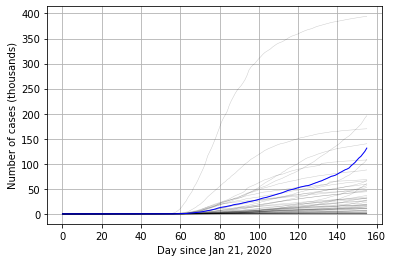

In [7]:
plt.plot(case_matrix.T/1000, color='black', linewidth=0.5, alpha=0.2);
i = state_names.index('Texas')
plt.plot(case_matrix[i]/1000, color='blue', linewidth=1)
plt.grid(True)
plt.xlabel('Day since Jan 21, 2020')
plt.ylabel('Number of cases (thousands)');

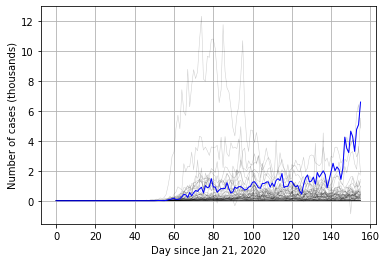

In [8]:
new_cases = np.diff(case_matrix, axis=1, prepend=0)

plt.plot(new_cases.T/1000, color='black', linewidth=0.5, alpha=0.2);
i = state_names.index('Texas')
plt.plot(new_cases[i]/1000, color='blue', linewidth=1)
plt.grid(True)
plt.xlabel('Day since Jan 21, 2020')
plt.ylabel('Number of cases (thousands)');

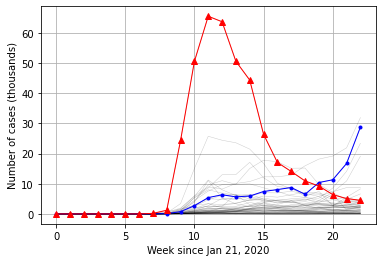

In [9]:
# Binned by week
new_cases = np.diff(case_matrix[:, ::7], axis=1, prepend=0)
weeks = np.arange(new_cases.shape[1])
plt.plot(weeks, new_cases.T/1000, color='black', linewidth=0.5, alpha=0.2);
i = state_names.index('Texas')
plt.plot(weeks, new_cases[i]/1000, '.-', color='blue', linewidth=1)
i = state_names.index('New York')
plt.plot(weeks, new_cases[i]/1000, '^-', color='red', linewidth=1)
plt.grid(True)
plt.xlabel('Week since Jan 21, 2020')
plt.ylabel('Number of cases (thousands)');

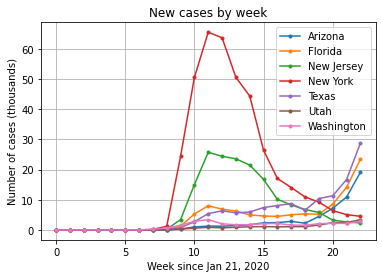

In [13]:
# Binned by week
state_names = np.array(state_names) 
selected_states = ["Texas", "New York", "Arizona", "Florida", "New Jersey", "Washington", "Utah"]
state_index = np.array([s in selected_states for s in state_names])

new_cases = np.diff(case_matrix[state_index, ::7], axis=1, prepend=0)
weeks = np.arange(new_cases.shape[1])

plt.plot(weeks, new_cases.T/1000, '.-')
plt.grid(True)
plt.xlabel('Week since Jan 21, 2020')
plt.ylabel('Number of cases (thousands)')
plt.legend(state_names[state_index])
plt.title('New cases by week');

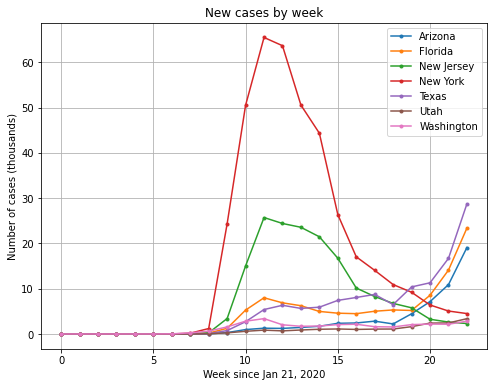

In [16]:
# Binned by week
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
state_names = np.array(state_names) 
selected_states = ["Texas", "New York", "Arizona", "Florida", "New Jersey", "Washington", "Utah"]
state_index = np.array([s in selected_states for s in state_names])

new_cases = np.diff(case_matrix[state_index, ::7], axis=1, prepend=0)
weeks = np.arange(new_cases.shape[1])

ax.plot(weeks, new_cases.T/1000, '.-')
ax.grid(True)
ax.set_xlabel('Week since Jan 21, 2020')
ax.set_ylabel('Number of cases (thousands)')
ax.legend(state_names[state_index])
ax.set_title('New cases by week')
fig.savefig('covid-week.pdf')

In [21]:
!open covid-week.pdf

## Align data by the 1000th case

In [80]:
# organize data into a matrix with state along 0-axis and day on 1-axis
state_names = sorted(list(set(states)))
case_matrix = np.empty((len(state_names), max(dates)+1))
case_matrix[:] = np.nan

for i, state in enumerate(state_names):
    ix = states == state
    try:
        onset = np.where(cases[states==state] >= 1000)[0][0]
    except IndexError:
        continue
    data = cases[ix][onset:]
    case_matrix[i, :data.size] = data

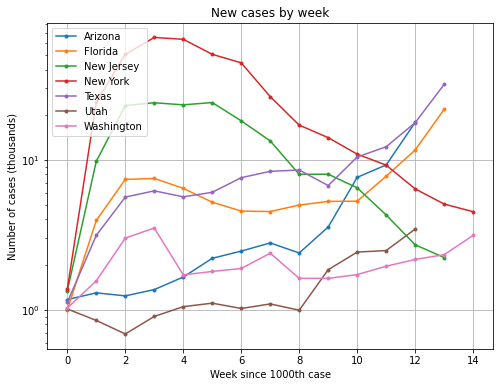

In [83]:
# Binned by week
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
state_names = np.array(state_names) 
selected_states = ["Texas", "New York", "Arizona", "Florida", "New Jersey", "Washington", "Utah"]
state_index = np.array([s in selected_states for s in state_names])

new_cases = np.diff(case_matrix[state_index, ::7], axis=1, prepend=0)

ax.plot(new_cases.T/1000, '.-')
ax.grid(True)
ax.set_xlabel('Week since 1000th case')
ax.set_ylabel('Number of cases (thousands)')
ax.legend(state_names[state_index])
ax.set_title('New cases by week')
ax.set_yscale('log')
fig.savefig('covid-week.pdf')